### ライブラリのインポートとフォント設定

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['font.family'] = 'Meiryo'  # Windows用日本語フォント

### ポケモンカードの読み込みと前処理

In [6]:
poke_df = pd.read_csv("merged_data_all.csv")

poke_df["発売日"] = pd.to_datetime(poke_df["発売日"], format="%Y年%m月%d日", errors='coerce')
poke_df["希望小売価格"] = poke_df["希望小売価格"].astype(str).str.replace("円", "").str.replace(",", "").astype(float)
poke_df["買取価格"] = poke_df["買取価格"].astype(str).str.replace("¥", "").str.replace(",", "").astype(float)

### ポケモンカードのROI/CAGR計算

In [7]:
today = datetime.today()

poke_df["経過年数"] = (today - poke_df["発売日"]).dt.days / 365.25
poke_df["ROI"] = (poke_df["買取価格"] - poke_df["希望小売価格"]) / poke_df["希望小売価格"]
poke_df["CAGR"] = (poke_df["買取価格"] / poke_df["希望小売価格"]) ** (1 / poke_df["経過年数"]) - 1

# 平均 ROI（倍率）と CAGR（年利）
poke_mean_roi = poke_df["ROI"].mean()
poke_mean_cagr = poke_df["CAGR"].mean()


### 貴金属データの読み込み関数と取得

In [8]:
def load_and_calc_cagr(csv_path):
    df = pd.read_csv(csv_path)
    df["日付け"] = pd.to_datetime(df["日付け"])
    df["終値"] = df["終値"].astype(str).str.replace(",", "").astype(float)
    df_sorted = df.sort_values("日付け")
    
    start_price = df_sorted.iloc[0]["終値"]
    end_price = df_sorted.iloc[-1]["終値"]
    years = (df_sorted.iloc[-1]["日付け"] - df_sorted.iloc[0]["日付け"]).days / 365.25
    
    roi = (end_price - start_price) / start_price
    cagr = (end_price / start_price) ** (1 / years) - 1
    return roi, cagr

# 各金属のデータ取得
gold_roi, gold_cagr = load_and_calc_cagr("gold_data.csv")
silver_roi, silver_cagr = load_and_calc_cagr("silver_data.csv")
platinum_roi, platinum_cagr = load_and_calc_cagr("platinum_data.csv")

### データの統合と可視化

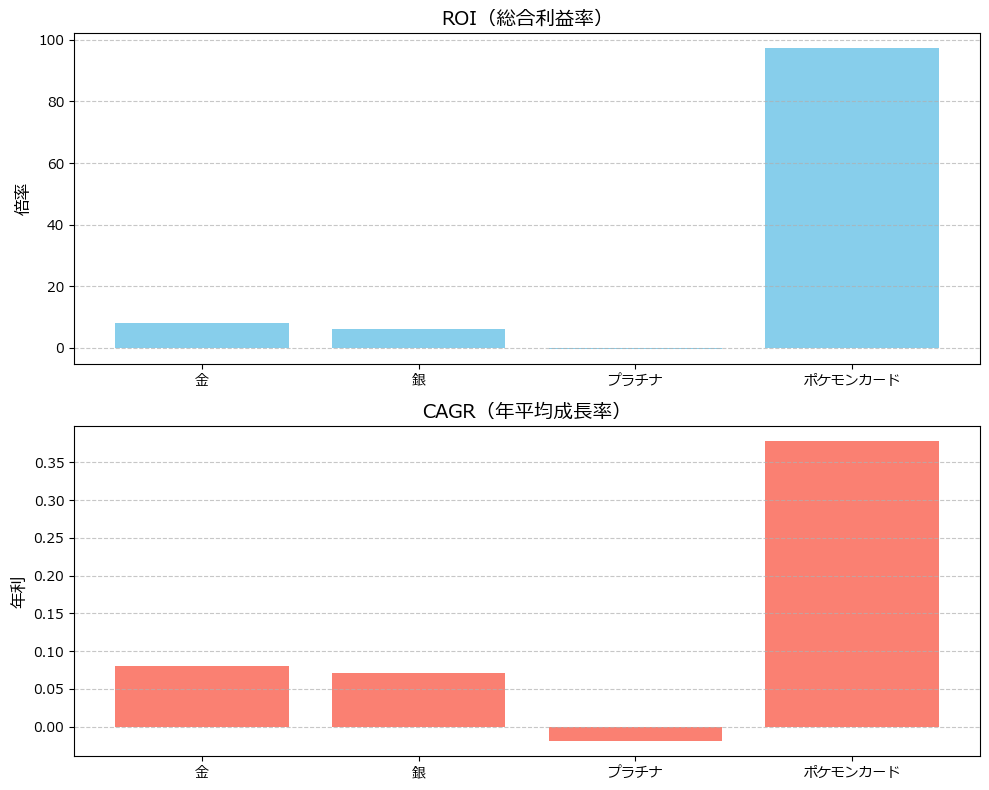

In [9]:
# 表示データまとめ
labels = ["金", "銀", "プラチナ", "ポケモンカード"]
roi_values = [gold_roi, silver_roi, platinum_roi, poke_mean_roi]
cagr_values = [gold_cagr, silver_cagr, platinum_cagr, poke_mean_cagr]

# 棒グラフ（上下2段）
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# ROI（倍率）
axes[0].bar(labels, roi_values, color='skyblue')
axes[0].set_title("ROI（総合利益率）", fontsize=14)
axes[0].set_ylabel("倍率", fontsize=12)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# CAGR（年利）
axes[1].bar(labels, cagr_values, color='salmon')
axes[1].set_title("CAGR（年平均成長率）", fontsize=14)
axes[1].set_ylabel("年利", fontsize=12)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()